[nltk_data] Downloading package vader_lexicon to C:\Users\SACHIN
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


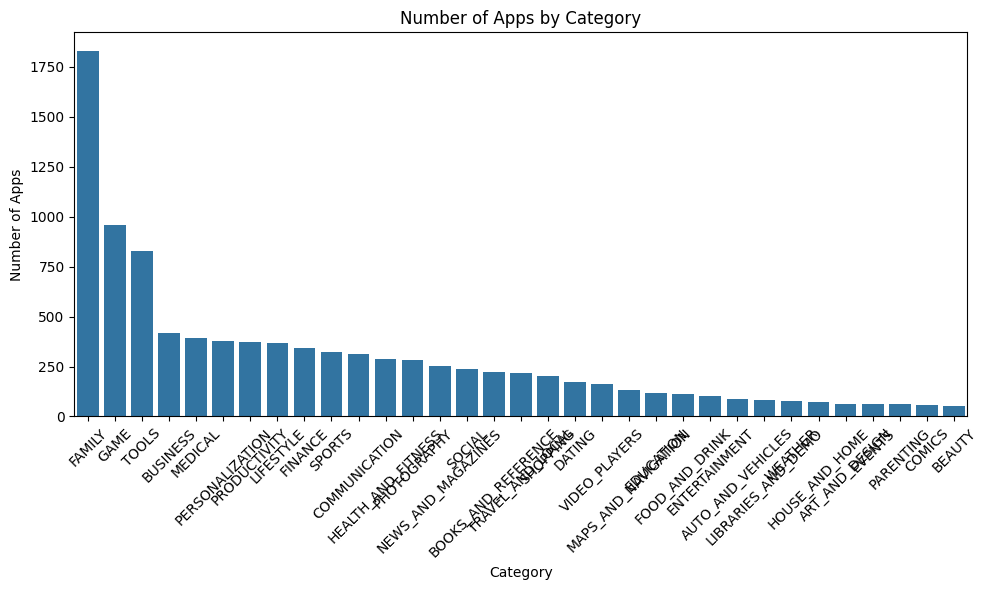

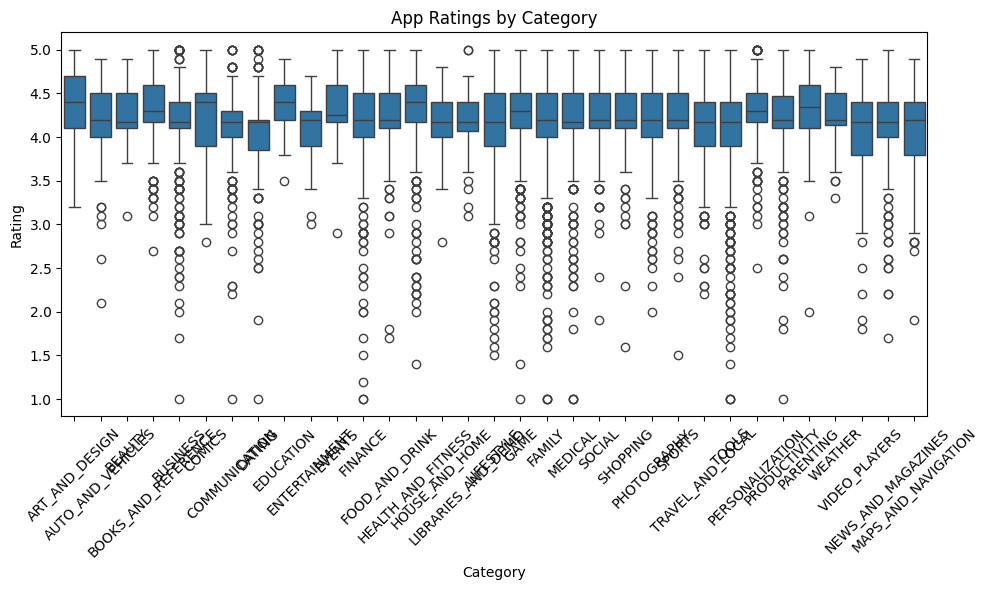

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
import nltk

# Download VADER lexicon if not already done
nltk.download('vader_lexicon')

# Load the datasets (update with your paths)
apps_df = pd.read_csv(r"C:\Users\SACHIN KUMAR\OneDrive\Desktop\data analytics\8th\apps.csv")
reviews_df = pd.read_csv(r"C:\Users\SACHIN KUMAR\OneDrive\Desktop\data analytics\8th\user_reviews.csv")  # Second CSV file

# -----------------------------------------------
# 1. Data Preparation for Apps
# -----------------------------------------------
# Ensure 'Size' is treated as a string and handle any anomalies
apps_df['Size'] = apps_df['Size'].astype(str).replace('NaN', '0M').str.replace('M', '').replace('', '0')
apps_df['Size'] = apps_df['Size'].astype(float) * 1024  # Convert to KB

# Clean 'Installs'
apps_df['Installs'] = apps_df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Fill missing ratings
apps_df['Rating'] = apps_df['Rating'].fillna(apps_df['Rating'].mean())

# -----------------------------------------------
# 2. Data Exploration for Apps
# -----------------------------------------------
# Category Exploration
plt.figure(figsize=(10, 6))
category_counts = apps_df['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Metrics Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=apps_df)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 3. Sentiment Analysis for Reviews
# -----------------------------------------------
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(review):
    score = sia.polarity_scores(review)
    return score['compound']

# Ensure the 'Review' column exists in reviews_df
if 'Review' in reviews_df.columns:
    reviews_df['Sentiment'] = reviews_df['Review'].apply(analyze_sentiment)

    # Merge sentiment scores back to apps_df (assuming a common 'App' column)
    merged_df = pd.merge(apps_df, reviews_df[['App', 'Sentiment']], on='App', how='left')

    # Normalize sentiment scores to be non-negative
    merged_df['Sentiment'] = merged_df['Sentiment'].apply(lambda x: max(0, x))

    # -----------------------------------------------
    # 4. Interactive Visualization
    # -----------------------------------------------
    fig = px.scatter(
        merged_df,
        x='Installs',
        y='Rating',
        color='Category',
        size='Sentiment',
        hover_name='App',
        title='Installs vs Rating with Sentiment Size'
    )
    fig.show()

# -----------------------------------------------
# 5. Skill Enhancement
# -----------------------------------------------
# Additional skills can be integrated from courses focused on data visualization and advanced analytics.
